In [95]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from colour import Color
import sys

# Metrics

## Degree Connectivity
**Degree Connectivity** – the number of edges connected to a node. In
the case of a directed graph, we can have 2-degree centrality measures:
**Inflow Centrality** and **Outflow Centrality**

In [2]:
def degree_connectivity(graph, node):
    """
    Compute connectivity degree of a graph

    Args:
        graph: NetworkX graph
            -
        node: str
            -
    Returns:
        inflow_centrality, outflow_centrality: int
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    if not isinstance(node, str):
        raise AssertionError("node must be str")

    return len(nx.edges(graph, node)), len([e for e in nx.edges(graph) if e[1] == node])

## Closeness Centrality
**Closeness Centrality** – Of a node is the average length of the shortest
path from the node to all other nodes

In [159]:
def closeness_centrality(graph, node, weight="Hours"):
    """
    Compute closeness centrality of a graph

    Args:
        graph: NetworkX graph
            -
        node: str
            -
        weight: str
            name of weight column
    Returns:
        closeness_centrality: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    if not isinstance(node, str):
        raise AssertionError("node must be str")

    result = 0
    
    paths = nx.shortest_path(graph, source=node)

    for node2 in nx.nodes(graph):
        if node != node2:
            result += sum([graph.edges[paths[node2][i], paths[node2][i + 1]][weight] for i in range(len(paths[node2]) - 1)])
            
    return result / (len(nx.nodes(graph)) - 1)

## Betweenness Centrality
**Betweenness Centrality** – Number of times a node is present in the
shortest path between 2 other nodes

In [27]:
def betweenness_centrality(graph, node):
    """
    Compute betweenness centrality of a graph

    Args:
        graph: NetworkX graph
            -
        node: str
            -
    Returns:
        betweenness_centrality: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    if not isinstance(node, str):
        raise AssertionError("node must be str")

    result = 0
    
    paths = nx.shortest_path(graph)

    for node1 in nx.nodes(graph):
        if node1 == node: continue
        for node2 in nx.nodes(graph):
            if node2 == node or node2 == node1: continue
            if node in paths[node1][node2]:
                result += 1
 
    return result

## Network Density
**Network Density** – based on how many edges a graph has; we can use
the formula for directed graphs:
$$
\frac{1}{n \cdot (n - 1)} \cdot \sum_{n=1}^{N}{deg(node_n)}
$$

In [45]:
def network_density(graph):
    """
    Compute network density of a graph

    Args:
        graph: NetworkX graph
            -
    Returns:
        network_density: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    if graph.is_directed():
        return len(graph.edges) / (len(graph.nodes) * (len(graph.nodes) - 1))
    else:
        return 2 * len(graph.edges) / (len(graph.nodes) * (len(graph.nodes) - 1))

## Network Diameter
**Network Diameter** – the longest of all its geodesics

In [112]:
def network_diameter(graph, weight="Hours"):
    """
    Compute network diameter of a graph

    Args:
        graph: NetworkX graph
            -
        weight: str
            name of weigth column
    Returns:
        network_diameter: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    paths = nx.shortest_path(graph)
    
    max_dist = -np.inf
    
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            cur_dist = sum([graph.edges[paths[node1][node2][i], paths[node1][node2][i + 1]][weight] for i in range(len(paths[node1][node2]) - 1)])
            if cur_dist > max_dist:
                max_dist = cur_dist

    return max_dist

## Network Average Path Length
**Network Average Path Length** – the average of all geodesics

In [114]:
def network_average_path_length(graph, weight="Hours"):
    """
    Compute network average path length of a graph

    Args:
        graph: NetworkX graph
            -
        weigth: str
            name of weight column
    Returns:
        network_average_path_length: float
    """

    if not isinstance(graph, nx.Graph):
        raise AssertionError("graph must be NetworkX graph")

    paths = nx.shortest_path(graph)
    
    result = 0
    
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            result += sum([graph.edges[paths[node1][node2][i], paths[node1][node2][i + 1]][weight] for i in range(len(paths[node1][node2]) - 1)])
            
    return result / (len(graph.nodes) * (len(graph.nodes) - 1))

## Cities of Azerbaijan 

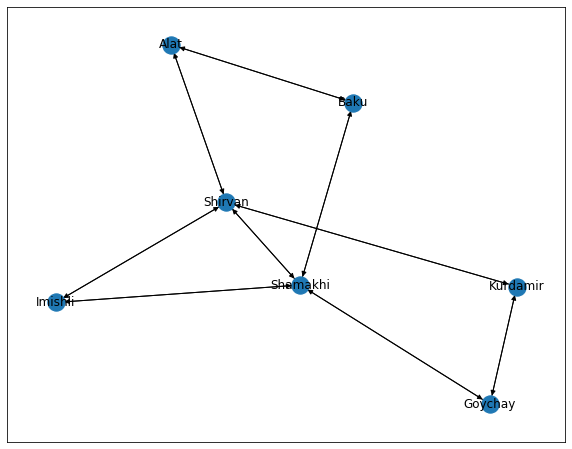

In [12]:
filename = "cities_in_az.csv"

data = pd.read_csv(filename)

graph = nx.from_pandas_edgelist(data, source="Origin", target="Destiny", edge_attr="Hours", create_using=nx.DiGraph)

plt.figure(figsize=(10, 8))
nx.draw_networkx(graph, with_labels=True)
plt.show()

### Shortest path

In [8]:
print("Baku -> Imishli, without weights:", nx.shortest_path(graph, source="Baku", target="Imishli"))
print("Baku -> Imishli, with weights   :", nx.shortest_path(graph, source="Baku", target="Imishli", weight="Hours"))

nx.add_path(graph, ["Baku", "Imishli"])
graph.edges["Baku", "Imishli"]["Hours"] = 1.29
print("After adding a path from Baku to Imishli with weight = 1.29")
print("Baku -> Imishli, without weights:", nx.shortest_path(graph, source="Baku", target="Imishli"))
print("Baku -> Imishli, with weights   :", nx.shortest_path(graph, source="Baku", target="Imishli", weight="Hours"))

Baku -> Imishli, without weights: ['Baku', 'Shamakhi', 'Imishli']
Baku -> Imishli, with weights   : ['Baku', 'Alat', 'Shirvan', 'Imishli']
After adding a path from Baku to Imishli with weight = 1.29
Baku -> Imishli, without weights: ['Baku', 'Imishli']
Baku -> Imishli, with weights   : ['Baku', 'Imishli']


In [21]:
degree_connectivity(graph, "Baku")

(2, 2)

In [24]:
closeness_centrality(graph, "Baku")

2.4683333333333333

In [29]:
betweenness_centrality(graph, "Baku")

3

In [47]:
network_density(graph)

0.42857142857142855

In [50]:
network_diameter(graph)

4.27

In [52]:
network_average_path_length(graph)

2.1619047619047618

In [91]:
connectivity = np.empty([len(graph.nodes)])
closeness    = np.empty([len(graph.nodes)])
betweenness  = np.empty([len(graph.nodes)])

for i, node in enumerate(graph.nodes):
    connectivity[i] = degree_connectivity(graph, node)[0]
    closeness[i]    = closeness_centrality(graph, node)
    betweenness[i]  = betweenness_centrality(graph, node)
    
connectivity_norm = connectivity / np.max(connectivity)
closeness_norm    = closeness    / np.max(closeness)   
betweenness_norm  = betweenness  / np.max(betweenness) 

''

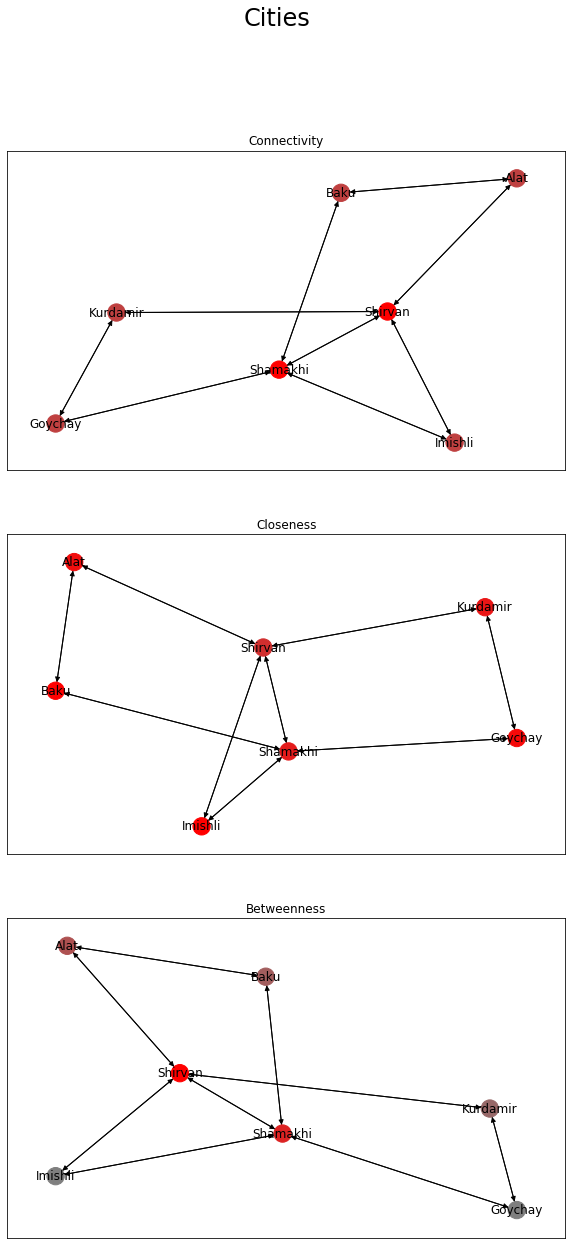

In [106]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))
fig.suptitle("Cities", fontsize=24)

nx.draw_networkx(graph, with_labels=True, ax=ax[0], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in connectivity_norm])
ax[0].set_title("Connectivity")

nx.draw_networkx(graph, with_labels=True, ax=ax[1], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in closeness_norm])
ax[1].set_title("Closeness")

nx.draw_networkx(graph, with_labels=True, ax=ax[2], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in betweenness_norm])
ax[2].set_title("Betweenness")
;

## Airports

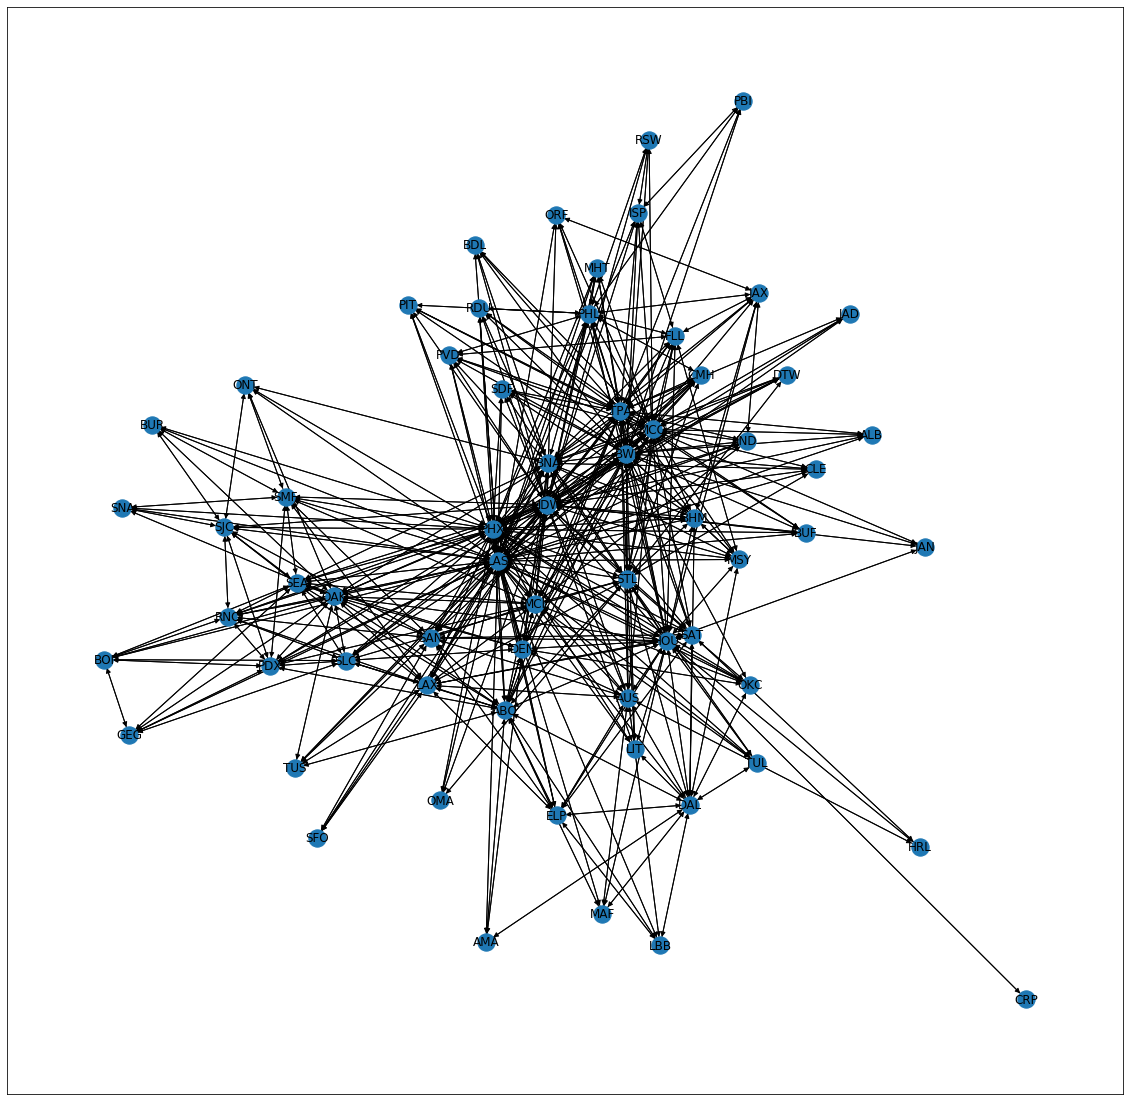

In [157]:
filename = "airports.csv"

data = pd.read_csv(filename)
data = data.dropna()

graph = nx.from_pandas_edgelist(data, source="Origin", target="Dest", edge_attr=True, create_using=nx.DiGraph)

plt.figure(figsize=(20, 20))
nx.draw_networkx(graph, with_labels=True)
plt.show()

In [158]:
print(np.sum(data.isnull()))

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
DepTime       0
CRSDepTime    0
ArrTime       0
CRSArrTime    0
AirTime       0
Origin        0
Dest          0
Distance      0
dtype: int64


In [117]:
print("CRP -> BOI, with Distance as weight:", nx.shortest_path(graph, source="CRP", target="BOI", weight="Distance"))
print("CRP -> BOI, with AirTime  as weight:", nx.shortest_path(graph, source="CRP", target="BOI", weight="AirTime"))

print(degree_connectivity(graph, "BOI"))
print(closeness_centrality(graph, "BOI", weight="Distance"))

CRP -> BOI, with Distance as weight: ['CRP', 'HOU', 'ABQ', 'SLC', 'BOI']
CRP -> BOI, with AirTime  as weight: ['CRP', 'HOU', 'DEN', 'SLC', 'BOI']
(7, 7)
1769.095238095238


In [160]:
connectivity = np.empty([len(graph.nodes)])
closeness1   = np.empty([len(graph.nodes)])
closeness2   = np.empty([len(graph.nodes)])
betweenness  = np.empty([len(graph.nodes)])

for i, node in enumerate(graph.nodes):
    connectivity[i] = degree_connectivity(graph, node)[0]
    closeness1[i]   = closeness_centrality(graph, node, "Distance")
    closeness2[i]   = closeness_centrality(graph, node, "AirTime")
    betweenness[i]  = betweenness_centrality(graph, node)
    
connectivity_norm = connectivity / np.max(connectivity)
closeness_norm1   = closeness1   / np.max(closeness1)   
closeness_norm2   = closeness2   / np.max(closeness2)   
betweenness_norm  = betweenness  / np.max(betweenness) 

''

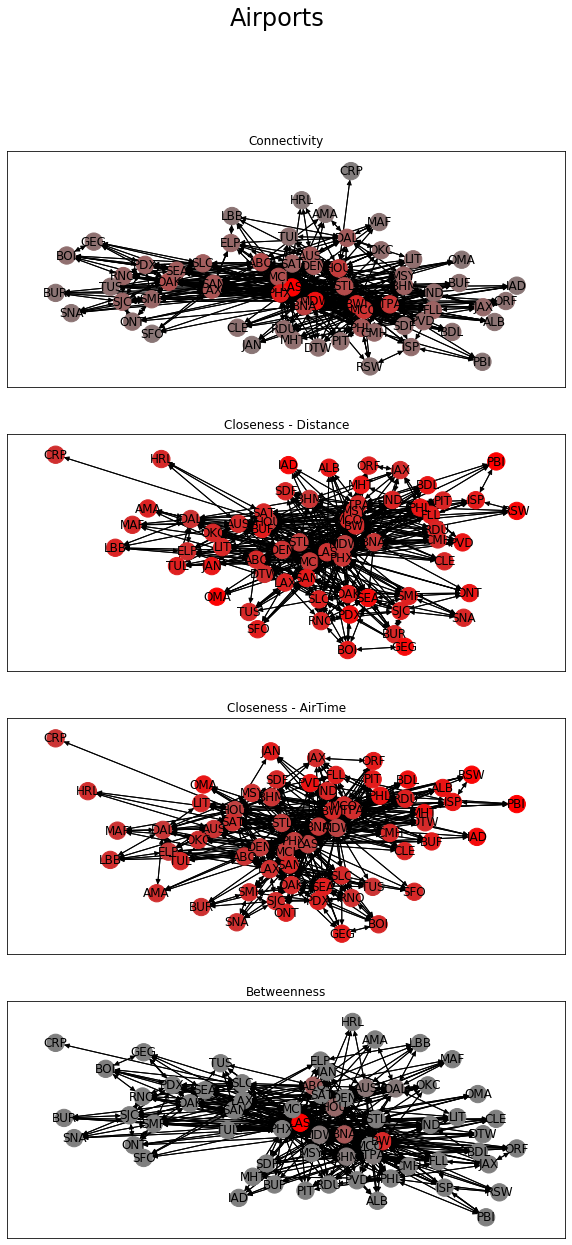

In [161]:
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle("Airports", fontsize=24)

nx.draw_networkx(graph, with_labels=True, ax=ax[0], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in connectivity_norm])
ax[0].set_title("Connectivity")

nx.draw_networkx(graph, with_labels=True, ax=ax[1], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in closeness_norm1])
ax[1].set_title("Closeness - Distance")

nx.draw_networkx(graph, with_labels=True, ax=ax[2], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in closeness_norm2])
ax[2].set_title("Closeness - AirTime")

nx.draw_networkx(graph, with_labels=True, ax=ax[3], node_color=[Color(hue=1, saturation=c, luminance=0.5).hex_l for c in betweenness_norm])
ax[3].set_title("Betweenness")
;